# Model Initialization 

In [1]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3,3),strides= (3,3), input_shape=(1000,1000,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32, (3,3),strides= (3,3), input_shape=(1000,1000,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32, (3,3),strides= (3,3), input_shape=(1000,1000,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 333, 333, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 166, 166, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

# Preprocessing 

In [3]:
X = np.ones((253, 512))

In [4]:
i = 0

In [5]:
TRAIN_YES = 'D:/Kuliah baru/SMT 8/Coding Skripsi/MATLAB Version/otsu_matlab/train/yes'
TRAIN_NO = 'D:/Kuliah baru/SMT 8/Coding Skripsi/MATLAB Version/otsu_matlab/train/no'
VAL_YES = 'D:/Kuliah baru/SMT 8/Coding Skripsi/MATLAB Version/otsu_matlab/val/yes'
VAL_NO = 'D:/Kuliah baru/SMT 8/Coding Skripsi/MATLAB Version/otsu_matlab/val/no'

In [6]:
os.chdir(TRAIN_YES)
for filename in os.listdir(TRAIN_YES):
    img = cv2.imread(filename)
    img = cv2.resize(img,(1000,1000))
    img = np.divide(img,255)
    img = img.reshape(1,1000,1000,3)
    X[i] = classifier.predict(img)
    i = i + 1

In [7]:
os.chdir(TRAIN_NO)
for filename in os.listdir(TRAIN_NO):
    img = cv2.imread(filename)
    img = cv2.resize(img,(1000,1000))
    img = np.divide(img,255)
    img = img.reshape(1,1000,1000,3)
    X[i] = classifier.predict(img)
    i = i + 1

In [8]:
os.chdir(VAL_YES)
for filename in os.listdir(VAL_YES):
    img = cv2.imread(filename)
    img = cv2.resize(img,(1000,1000))
    img = np.divide(img,255)
    img = img.reshape(1,1000,1000,3)
    X[i] = classifier.predict(img)
    i = i + 1

In [9]:
os.chdir(VAL_NO)
for filename in os.listdir(VAL_NO):
    img = cv2.imread(filename)
    img = cv2.resize(img,(1000,1000))
    img = np.divide(img,255)
    img = img.reshape(1,1000,1000,3)
    X[i] = classifier.predict(img)
    i = i + 1

In [10]:
y = np.concatenate((np.ones(121), np.zeros(79), np.ones(34), np.zeros(19)))

# Preparation Training and Test Splitting 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9875)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202, 512), (51, 512), (202,), (51,))

In [12]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

model = LinearSVC()
parameters = {'C':[0.1,1,10,100,1000,10000,100000]}
grid_search = GridSearchCV(param_grid = parameters, estimator = model, verbose = 3)

In [13]:
grid_search = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.829, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.707, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.750, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.800, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.750, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.805, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Lib

[CV] ................................ C=10, score=0.805, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.732, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.700, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.800, total=   0.1s
[CV] C=10 ............................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=10, score=0.725, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.780, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.659, total=   0.1s
[CV] C=100 ...........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=100, score=0.750, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.800, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.725, total=   0.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.732, total=   0.1s
[CV] C=1000 ..........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=1000, score=0.659, total=   0.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.750, total=   0.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.800, total=   0.1s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.725, total=   0.1s
[CV] C=10000 .........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................. C=10000, score=0.732, total=   0.1s
[CV] C=10000 .........................................................
[CV] ............................. C=10000, score=0.659, total=   0.1s
[CV] C=10000 .........................................................
[CV] ............................. C=10000, score=0.750, total=   0.1s
[CV] C=10000 .........................................................


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................. C=10000, score=0.800, total=   0.1s
[CV] C=10000 .........................................................
[CV] ............................. C=10000, score=0.750, total=   0.1s
[CV] C=100000 ........................................................
[CV] ............................ C=100000, score=0.732, total=   0.1s
[CV] C=100000 ........................................................
[CV] ............................ C=100000, score=0.659, total=   0.1s
[CV] C=100000 ........................................................
[CV] ............................ C=100000, score=0.750, total=   0.1s
[CV] C=100000 ........................................................
[CV] ............................ C=100000, score=0.800, total=   0.1s
[CV] C=100000 ........................................................
[CV] ............................ C=100000, score=0.725, total=   0.1s


C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shand\anaconda3\envs\sandbox\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.7s finished


In [14]:
print("Validation Accuracy:",grid_search.score(X_test,y_test))
print("Training Accuracy:  ",grid_search.score(X_train, y_train))

Validation Accuracy: 0.8235294117647058
Training Accuracy:   0.8118811881188119


In [15]:
grid_search.best_params_

{'C': 0.1}

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

predictions=grid_search.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[14  6]
 [ 3 28]]


              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76        20
         1.0       0.82      0.90      0.86        31

    accuracy                           0.82        51
   macro avg       0.82      0.80      0.81        51
weighted avg       0.82      0.82      0.82        51



https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict

https://stats.stackexchange.com/questions/329857/what-is-the-difference-between-decision-function-predict-proba-and-predict-fun

Pakai Decision Function atau Predict?

In [17]:
from sklearn.metrics import f1_score, average_precision_score

y_score = grid_search.decision_function(X_test) #pairwise classifier
f1score = f1_score(y_test, predictions)
average_precision_decision = average_precision_score(y_test, y_score)
average_precision_predict = average_precision_score(y_test, predictions)

print(f'F1-Score: {f1score}')
print(f'Precision with Decision Function : {average_precision_decision}')
print(f'Precision with Predict Function : {average_precision_predict}')

F1-Score: 0.8615384615384616
Precision with Decision Function : 0.8809870032414528
Precision with Predict Function : 0.8026565464895635


In [18]:
scores = [x[1] for x in grid_search.cv_results_]

In [19]:
scores = np.array(scores).reshape(14)

In [20]:
# MODULE FOR CONFUSION MATRIX

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix Niblack',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14  6]
 [ 3 28]]


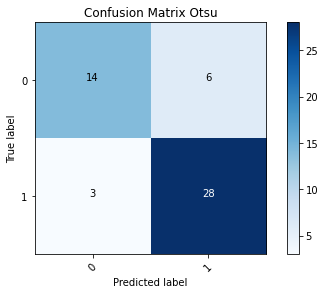

In [21]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, grid_search.predict(X_test)), classes=[0,1], normalize=False,
                      title='Confusion Matrix Otsu')